In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!unzip birds_classifier.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

creating data loaders

In [ ]:
#datasci libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#tensorflow
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam, RMSprop

#visualization
from matplotlib.pyplot import imshow
import cv2

#misc
import os.path
from pathlib import Path
import glob
import random
from sklearn.metrics import classification_report

In [ ]:
train_path = '/content/drive/MyDrive/train'
val_path = '/content/drive/MyDrive/valid'
test_path = '/content/drive/MyDrive/test'

batch = 32
imgres = (224, 224)

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255)
val_generator = ImageDataGenerator(rescale = 1./255)
test_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_images = train_generator.flow_from_directory(
    train_path,
    target_size=imgres,
    class_mode='categorical',
    batch_size=batch
)

val_images = val_generator.flow_from_directory(
    val_path,
    target_size=imgres,
    class_mode='categorical',
    batch_size=batch
)

test_images = test_generator.flow_from_directory(
    test_path,
    target_size=imgres,
    class_mode='categorical',
    batch_size=batch,
    shuffle = False
)


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [ ]:
inception = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))
inception.trainable = True
for layer in inception.layers[:197]:
    layer.trainable = False
for layer in inception.layers:
    print(layer.name, '--', layer.trainable)

87910968/87910968 [==============================] - 0s 0us/step
input_1 -- False
conv2d -- False
batch_normalization -- False
activation -- False
conv2d_1 -- False
batch_normalization_1 -- False
activation_1 -- False
conv2d_2 -- False
batch_normalization_2 -- False
activation_2 -- False
max_pooling2d -- False
conv2d_3 -- False
batch_normalization_3 -- False
activation_3 -- False
conv2d_4 -- False
batch_normalization_4 -- False
activation_4 -- False
max_pooling2d_1 -- False
conv2d_8 -- False
batch_normalization_8 -- False
activation_8 -- False
conv2d_6 -- False
conv2d_9 -- False
batch_normalization_6 -- False
batch_normalization_9 -- False
activation_6 -- False
activation_9 -- False
average_pooling2d -- False
conv2d_5 -- False
conv2d_7 -- False
conv2d_10 -- False
conv2d_11 -- False
batch_normalization_5 -- False
batch_normalization_7 -- False
batch_normalization_10 -- False
batch_normalization_11 -- False
activation_5 -- False
activation_7 -- False
activation_10 -- False
activation_11 

In [ ]:
last_layer = inception.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
layer_output = last_layer.output

n_categories = len(os.listdir('/content/drive/MyDrive/train'))
print(n_categories)

last layer output shape:  (None, 12, 12, 768)
525


In [ ]:
x = Flatten()(layer_output)
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(n_categories, activation='softmax')(x)

model = Model(inputs=inception.inputs, outputs=x)
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = model.fit(
            train_images,
            validation_data = val_images,
            epochs = 25,
            callbacks=[callback])

Epoch 1/25
2645/2645 [==============================] - 378s 136ms/step - loss: 3.5740 - accuracy: 0.4732 - val_loss: 1.4248 - val_accuracy: 0.8766 - lr: 1.0000e-04
Epoch 2/25
2645/2645 [==============================] - 314s 119ms/step - loss: 1.5578 - accuracy: 0.8320 - val_loss: 1.2646 - val_accuracy: 0.9029 - lr: 1.0000e-04
Epoch 3/25
2645/2645 [==============================] - 306s 116ms/step - loss: 1.2278 - accuracy: 0.8953 - val_loss: 1.1605 - val_accuracy: 0.9166 - lr: 1.0000e-04
Epoch 4/25
2645/2645 [==============================] - 313s 118ms/step - loss: 1.0859 - accuracy: 0.9164 - val_loss: 1.0898 - val_accuracy: 0.9238 - lr: 1.0000e-04
Epoch 5/25
2645/2645 [==============================] - 309s 117ms/step - loss: 0.9921 - accuracy: 0.9295 - val_loss: 1.0402 - val_accuracy: 0.9154 - lr: 1.0000e-04
Epoch 6/25
2645/2645 [==============================] - 310s 117ms/step - loss: 0.9276 - accuracy: 0.9338 - val_loss: 0.9862 - val_accuracy: 0.9250 - lr: 1.0000e-04
Epoch 7/25

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.19715
Test Accuracy: 96.95%


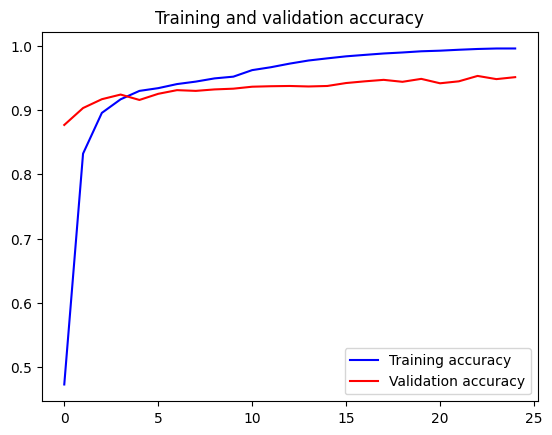

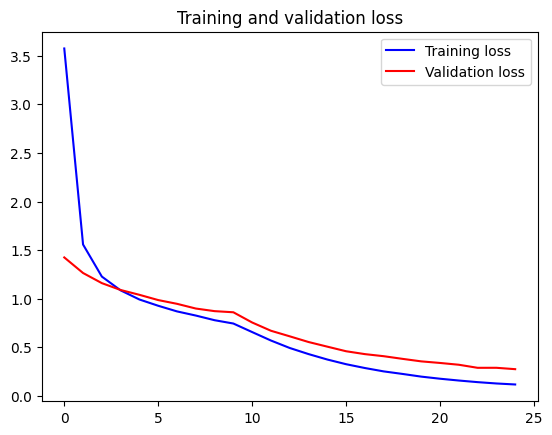

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

83/83 [==============================] - 10s 110ms/step


In [ ]:
pred[:20]

['ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABBOTTS BOOBY',
 'ABBOTTS BOOBY',
 'NORTHERN GANNET',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'ABYSSINIAN GROUND HORNBILL',
 'ABYSSINIAN GROUND HORNBILL',
 'ABYSSINIAN GROUND HORNBILL',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE',
 'AFRICAN CROWNED CRANE']

In [ ]:
image_dir = Path(test_path)

filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

test_df = pd.concat([filepaths, labels], axis=1)
test_df = test_df.sort_values(by='Filepath')
print(test_df.shape)
test_df.head()

(2625, 2)


Filepath            Label
0  /content/drive/MyDrive/test/ABBOTTS BABBLER/1.jpg  ABBOTTS BABBLER
1  /content/drive/MyDrive/test/ABBOTTS BABBLER/2.jpg  ABBOTTS BABBLER
2  /content/drive/MyDrive/test/ABBOTTS BABBLER/3.jpg  ABBOTTS BABBLER
3  /content/drive/MyDrive/test/ABBOTTS BABBLER/4.jpg  ABBOTTS BABBLER
4  /content/drive/MyDrive/test/ABBOTTS BABBLER/5.jpg  ABBOTTS BABBLER

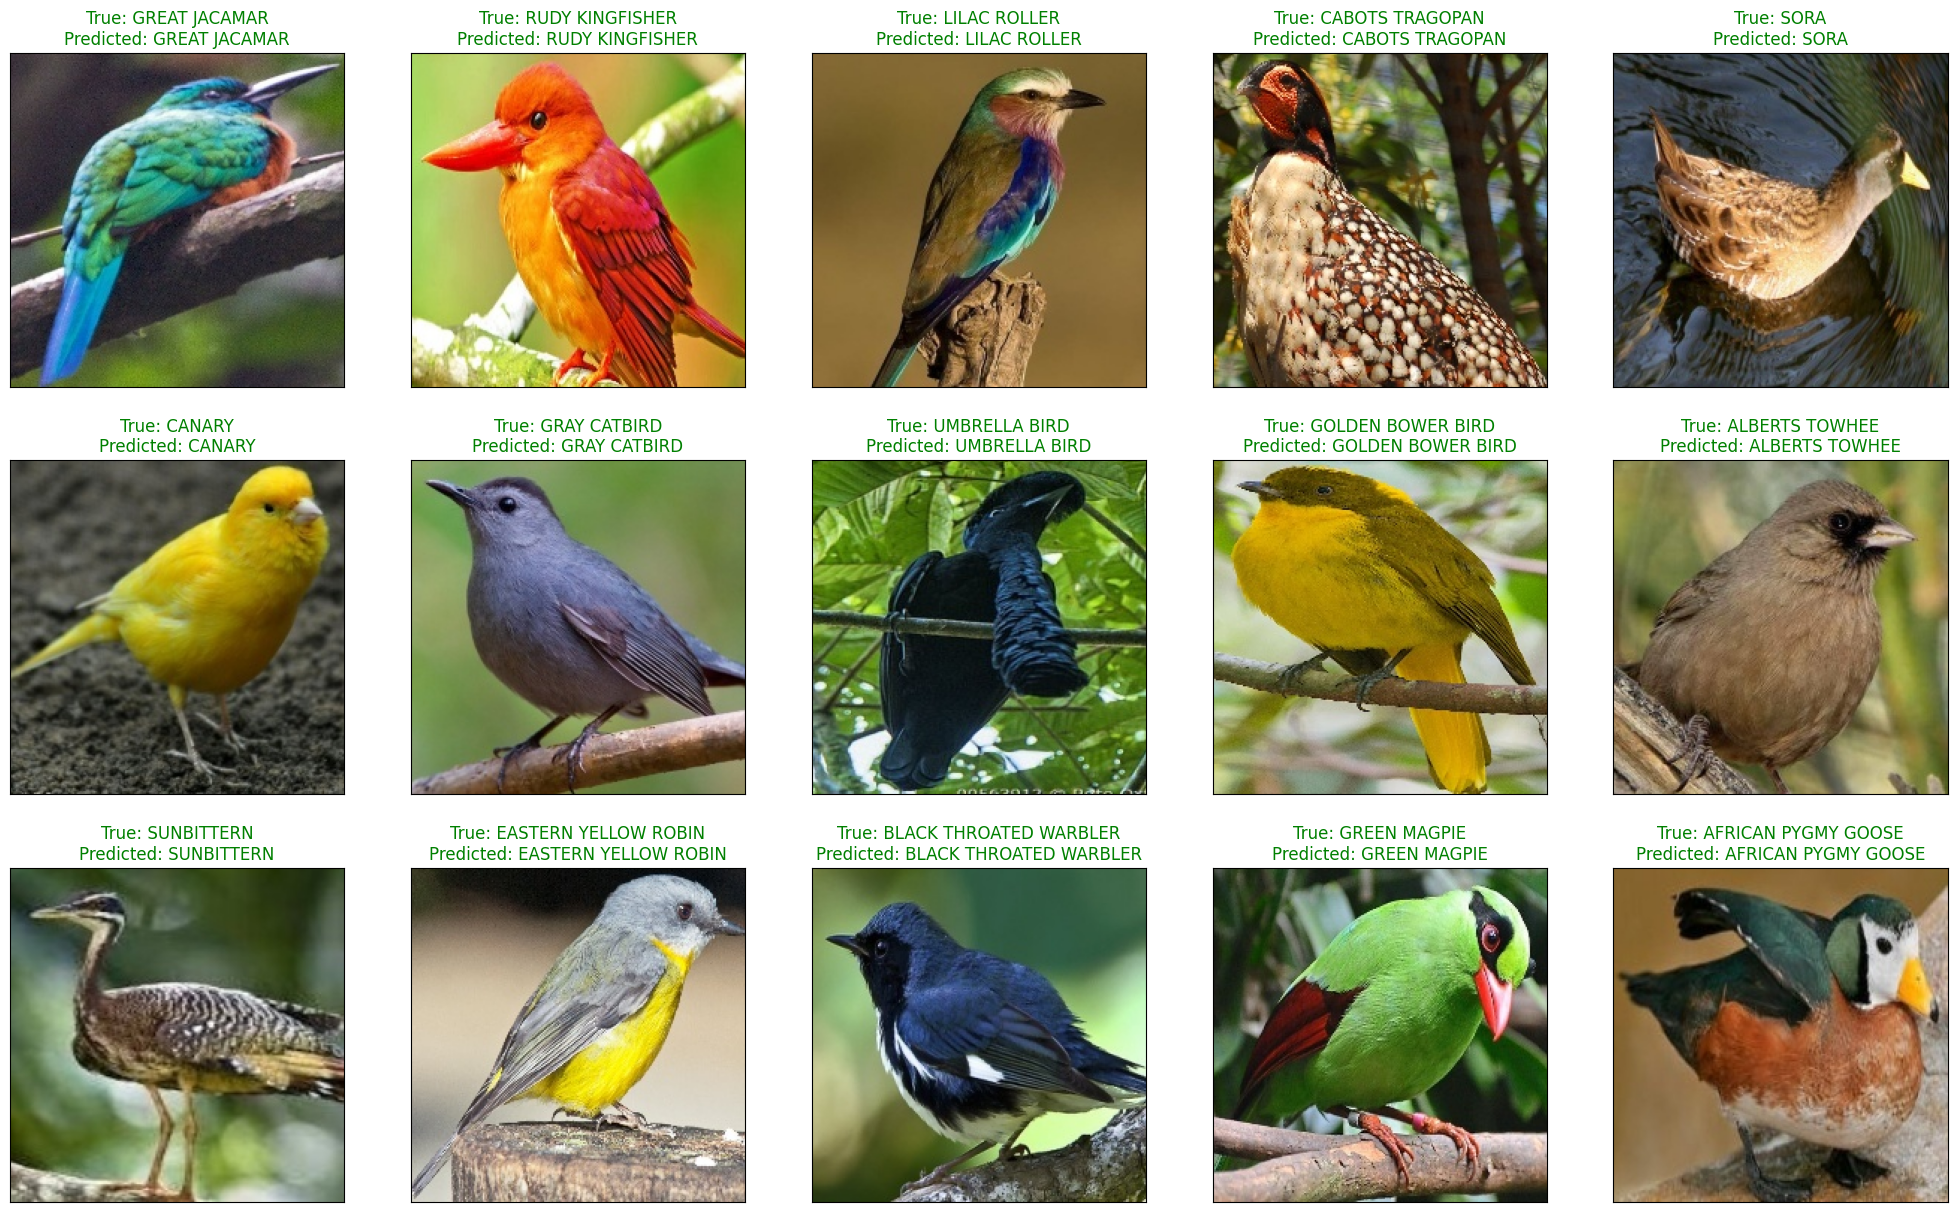

<Figure size 640x480 with 0 Axes>

In [ ]:
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [ ]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.83      1.00      0.91         5
                ABBOTTS BOOBY       1.00      0.80      0.89         5
   ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
            AFRICAN FIREFINCH       1.00      0.80      0.89         5
       AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
        AFRICAN PIED HORNBILL       1.00      1.00      1.00         5
          AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                    ALBATROSS       1.00      1.00      1.00         5
               ALBERTS TOWHEE       1.00      1.00      1.00         5
         ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
                ALPINE CHOUGH       1.00      1.00      1.00         5
     

In [ ]:
model.save('inceptionv3_birdclassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
